<a href="https://colab.research.google.com/github/m3t3orkoga/HomeworkCNN/blob/main/Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D ,Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir="/content/drive/MyDrive/Faces"

img_width, img_height = 128, 128
batch_size=32

train_datagen =ImageDataGenerator(
  rescale=1.0/255,
  rotation_range=30,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode="nearest"
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(img_width, img_height),
  batch_size=batch_size,
  class_mode="categorical"
)

model = Sequential([
  Conv2D(32, (3,3), activation="relu", input_shape=(img_width, img_height, 3)),
  MaxPooling2D(2,2),
  Conv2D(64, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Conv2D(128, (3,3), activation="relu"),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(128, activation="relu"),
  Dropout(0.5),
  Dense(5, activation="softmax")
])

Found 52 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer="adam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])
model.summary()

epochs = 20
history =model.fit(train_generator,epochs=epochs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 965ms/step - accuracy: 0.7348 - loss: 0.8480
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.7324 - loss: 0.7069
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.8301 - loss: 0.6182
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 875ms/step - accuracy: 0.7244 - loss: 0.7750
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 867ms/step - accuracy: 0.6821 - loss: 0.6696
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 940ms/step - accuracy: 0.7372 - loss: 0.7407
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8346 - loss: 0.5397
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 791ms/step - accuracy: 0.8218 - loss: 0.5565
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 935ms/step - accuracy: 0.8346 - loss: 0.4842
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 849ms/step - accuracy: 0.8013 - loss: 0.5650
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step - accuracy: 0.7548 - loss: 0.6540
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 924ms/step - accuracy: 0.9022 - loss:

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/face_recognition.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


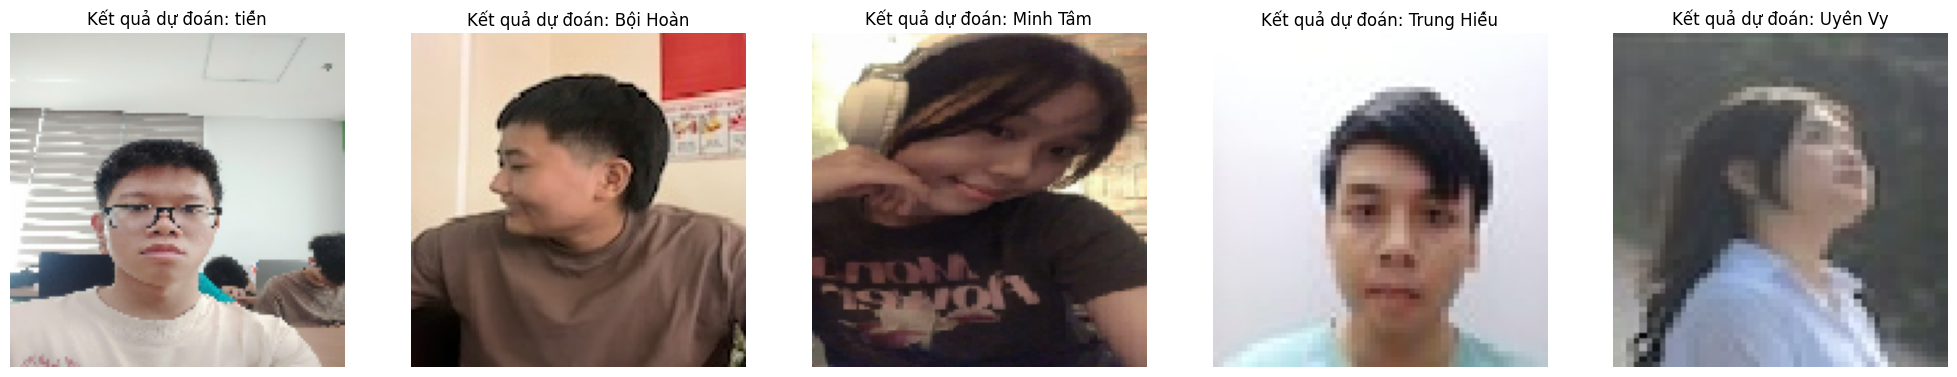

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt

model = load_model('/content/drive/MyDrive/face_recognition.h5')

image_paths = [
    "/content/drive/MyDrive/Faces/tiến/tiến4.jpg",
    "/content/drive/MyDrive/Faces/Bội Hoàn/Hoàn 2.jpeg",
    "/content/drive/MyDrive/Faces/Minh Tâm/tam4.jpg",
    "/content/drive/MyDrive/Faces/Trung Hiếu/hieu6.jpg",
    "/content/drive/MyDrive/Faces/Uyên Vy/vy 9.jpeg"

]

num_images = len(image_paths)

fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

for i, path in enumerate(image_paths):
    img = load_img(path, target_size=(128, 128))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    prediction = np.argmax(model.predict(img_array))

    class_labels = {v: k for k, v in train_generator.class_indices.items()}
    person_name = class_labels[prediction]

    axes[i].imshow(img)
    axes[i].axis("off")
    axes[i].set_title(f"Kết quả dự đoán: {person_name}")

plt.show()
